In [1]:
import sys
import os

from typing import List, Tuple

import matplotlib.pyplot as plt
%matplotlib notebook

import numpy as np
import xarray as xr
import fenics as fen

from argschema import ArgSchemaParser

from neuron_morphology.transforms.pia_wm_streamlines._schemas import (
    PiaWmStreamlineSchema, OutputParameters)
from neuron_morphology.transforms.streamline import generate_laplace_field
from neuron_morphology.transforms.pia_wm_streamlines.calculate_pia_wm_streamlines import convert_path_str_to_list

In [2]:
# wm_path_str= "10824,4276,10996,4372,11184,4520,11348,4704,11584,4924,11788,5140"
# soma_path_str = "12164,3215,12165,3213,12166,3213,12167,3212,12168,3211,12169,3211,12169,3210,12171,3210,12172,3209,12173,3209,12174,3209,12175,3208,12175,3207,12177,3207,12178,3207,12179,3206,12180,3206,12181,3205,12183,3205,12183,3204,12184,3204,12185,3204,12186,3204,12187,3204,12188,3204,12189,3204,12190,3204,12191,3204,12192,3204,12193,3204,12194,3204,12194,3205,12195,3205,12195,3206,12196,3206,12197,3207,12198,3208,12198,3209,12198,3210,12199,3210,12199,3211,12200,3212,12200,3213,12200,3214,12201,3215,12201,3216,12202,3217,12203,3218,12203,3219,12203,3220,12204,3220,12204,3221,12204,3222,12204,3223,12204,3224,12203,3226,12203,3227,12202,3229,12202,3230,12201,3230,12200,3231,12198,3232,12197,3233,12196,3233,12195,3233,12195,3234,12194,3234,12194,3235,12193,3235,12192,3236,12191,3236,12190,3236,12189,3236,12189,3237,12188,3237,12188,3238,12187,3238,12186,3239,12185,3239,12184,3239,12183,3239,12182,3239,12182,3240,12181,3240,12180,3240,12179,3240,12178,3240,12177,3240,12177,3241,12176,3241,12175,3241,12174,3241,12173,3241,12172,3241,12171,3241,12170,3241,12170,3240,12169,3240,12168,3240,12167,3239,12167,3238,12166,3237,12166,3236,12165,3235,12165,3234,12164,3233,12164,3232,12164,3231,12164,3230,12164,3229,12164,3228,12164,3227,12164,3226,12164,3225,12164,3224,12164,3223,12164,3222,12164,3221,12164,3220,12164,3219,12164,3218,12165,3218,12165,3217,12165,3216,12166,3215,12164,3215"
# pia_path_str = "11448,1488,11608,1544,11856,1632,12048,1712,12264,1784,12504,1888,12776,1984,13064,2120,13384,2288,13696,2464,14056,2720"
pia_path_str = '120,100,0,100'
wm_path_str = '20,0,100,0'
soma_path_str = '50,50'

resolution = 1.0

pia_path = convert_path_str_to_list(pia_path_str, resolution)
wm_path = convert_path_str_to_list(wm_path_str, resolution)
soma_path = convert_path_str_to_list(soma_path_str, resolution)

soma_center = np.asarray([0, 0])
soma_center = np.mean(soma_path, axis=0)
pia_path = [(x - soma_center[0], y - soma_center[1])
            for (x, y) in pia_path]
wm_path = [(x - soma_center[0], y - soma_center[1])
           for (x, y) in wm_path]

(u, grad_u, mesh, mesh_coords, mesh_values, mesh_gradients) = \
        generate_laplace_field(pia_path,
                               wm_path,
                               mesh_res=20,
                               top_value=1,
                               bottom_value=0,
                               eps_bounds=1e-8)

x = [coord[0] for coord in mesh_coords]
y = [coord[1] for coord in mesh_coords]

Mesh values [1.00000000e+00 1.00000000e+00 2.25574330e-17 3.44342942e-18
 1.00000000e+00]
Mesh gradients [[-5.04467770e-04  5.14335022e-03]
 [ 4.94942470e-04  5.14749751e-03]
 [-6.35149302e-04  1.49724277e-02]
 [ 6.32016633e-04  1.47736710e-02]
 [-1.41785285e-06  8.94078447e-03]]
mvals [1.00000000e+00 1.00000000e+00 2.25574330e-17 3.44342942e-18
 1.00000000e+00]
mgrads [[-5.04467770e-04  5.14335022e-03]
 [ 4.94942470e-04  5.14749751e-03]
 [-6.35149302e-04  1.49724277e-02]
 [ 6.32016633e-04  1.47736710e-02]
 [-1.41785285e-06  8.94078447e-03]]


<IPython.core.display.Javascript object>


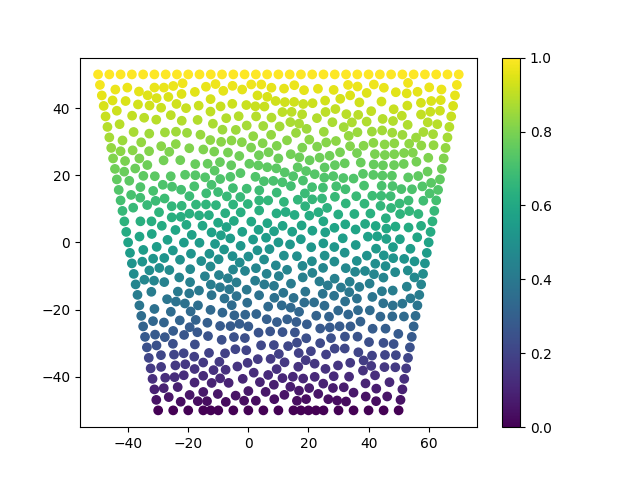

<IPython.core.display.Javascript object>


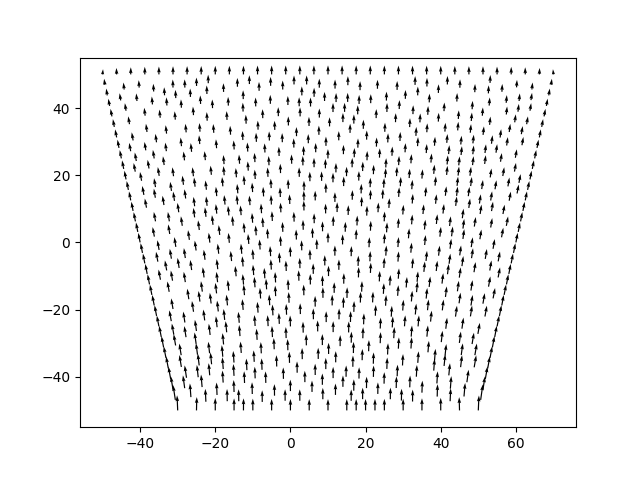

In [3]:
print('Mesh values', mesh_values[0:5])
print('Mesh gradients', mesh_gradients[0:5])

mvals_test = u.compute_vertex_values(mesh)
mgrads_test = np.reshape(grad_u.compute_vertex_values(mesh), [2, len(mesh_coords)]).T

print('mvals', mvals_test[0:5])
print('mgrads',mgrads_test[0:5])

fig, ax = plt.subplots()
a = plt.scatter(x, y, c=mvals_test)
plt.colorbar(a)

fig, ax = plt.subplots()
plt.quiver(x, y, mgrads_test[:, 0],  mgrads_test[:, 1])


<IPython.core.display.Javascript object>


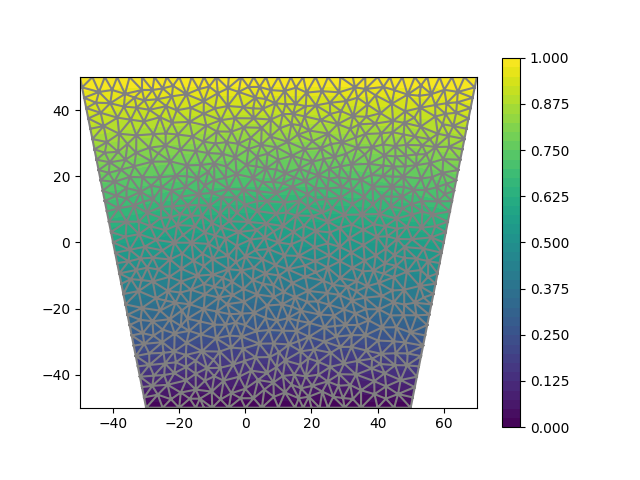

In [4]:
fig, ax = plt.subplots()
d = fen.plot(u)
plt.colorbar(d)

m = fen.plot(mesh)

<IPython.core.display.Javascript object>


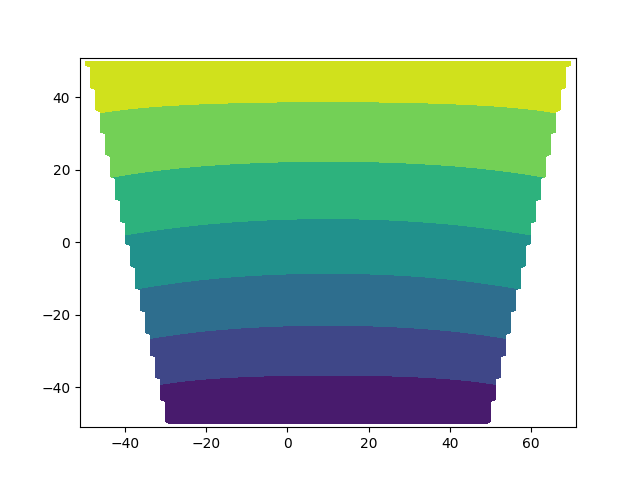

<IPython.core.display.Javascript object>


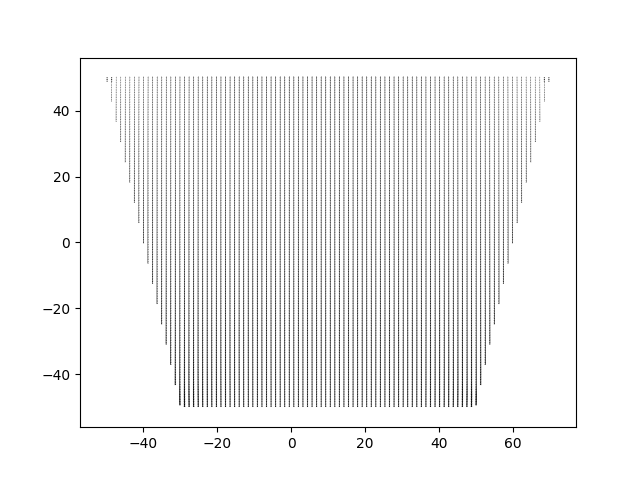

(100, 200, 2)


In [5]:
from scipy.interpolate import griddata

n = 100

xx = np.linspace(min(x)-1, max(x)+1, n)
yy = np.linspace(min(y)-1, max(y)+1, 2*n)
X, Y = np.meshgrid(xx, yy, indexing='ij')

px = x
py = y

grid_z = griddata((px, py), np.asarray(mesh_values), (X, Y), method='cubic')
grid_zdot = griddata((px, py), np.asarray(mesh_gradients), (X, Y), method='cubic')

fig, ax = plt.subplots()
plt.contourf(X, Y, grid_z)

fig, ax = plt.subplots()
plt.quiver(X, Y, grid_zdot[:,:, 0].flatten(), grid_zdot[:, :, 1].flatten())

print(grid_zdot.shape)
